#### The goals of this notebook 
To understand random forests and to compare random forest ensembles with single decision tree classifiers

#### Dataset information
The data is about e-tailer customers, the training data contains 334 variables for a known set of 10,000 customers and non-customers with a ratio of 1:10, respectively. 
The test data consists of a set of examples and is drawn from the same distribution as the training set.  The feature data is train10000.csv and the label data is train10000_label.csv with corresponding labels 
for the records in train10000.csv. The test10000.csv is the test data with corresponding labels for the records in test10000-label.csv. 


#### Methodology

I first explore the features distribution for each feature, and I find there are multiple features that have a large proportion of the value 999000. According to the feature distribution of these features, 999000 is much larger than the rest of the values in their feature columns, therefore, I decide to look at 999000 as a place holder in columns 0,5,6,9 and 14. And because these columns all have less than 5 distinct values, I then assigned them to be the categorical variables.

Next, I then calculate the IQR for the numerical variables to remove outliers and normalize the numerical data with standardized method (subtract the variable mean from each variable then divided by its standard deviation). After that, I combine the numerical variables and the dummy variables (transformation of the categorical variables) to apply for the further feature selection.

For the feature selection method, I compute the chi square stats for each non-negative feature and class, and choose the top 10% of the features before building the models.

For the class imbalanced issue, the method I used is the down sampling technique. Originally the class 0 has 9091 instances and the class 1 has 909 instances, after conducting the down sampling on class 0, both classes have 909 instances before building the models.


#### Conclusion for the experiments 

I found that the random forest classifiers perform better than the decision tree classifiers on different scenarios(listed down below), and among all, the random forest classifiers with balanced class are generally perform well and have similar performance. 

After carefully observation, I found the random forest classifier with n_estimators=60, max_depth=1000, min_samples_split=95, min_samples_leaf=48 performs the best on the training set, and I then test this model on the testing set.



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
train_tb=pd.read_csv('C:/Users/Rai Chiang/Desktop/DePaul Course/csc529/Assignment3/assignment3_problem2/train10000.csv',header=None).astype("int")
train=pd.read_csv('C:/Users/Rai Chiang/Desktop/DePaul Course/csc529/Assignment3/assignment3_problem2/train10000.csv',header=None)
test_tb=pd.read_csv('C:/Users/Rai Chiang/Desktop/DePaul Course/csc529/Assignment3/assignment3_problem2/test10000.csv',header=None).astype("int")
train_class=pd.read_csv('C:/Users/Rai Chiang/Desktop/DePaul Course/csc529/Assignment3/assignment3_problem2/train10000_Label.csv',header=None)
test_class=pd.read_csv('C:/Users/Rai Chiang/Desktop/DePaul Course/csc529/Assignment3/assignment3_problem2/train10000_Label.csv',header=None)

In [11]:
train_class[0].value_counts()

0    9091
1     909
Name: 0, dtype: int64

In [12]:
test_class[0].value_counts()

0    9091
1     909
Name: 0, dtype: int64

In [13]:
train_tb.describe()

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,520579.228800,46.67080,243557.570100,46.883100,196027.300000,239960.85960,430870.825900,706594.051500,302101.437800,542557.524000,...,46.719600,13.12730,77.677900,14.245500,6.130200,3.305400,22.812100,20.557600,277.052500,167.904900
std,499079.648645,9.25717,428964.747884,10.578271,950.497267,426798.36193,494785.452455,454567.505278,458858.669779,497664.991029,...,14.360836,7.08639,21.731907,5.927136,2.448928,1.857546,18.892858,8.910287,124.722781,87.244324
min,0.000000,18.00000,1.000000,18.000000,190000.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,46.00000,1.000000,42.000000,196000.000000,1.00000,4.000000,8.000000,5.000000,1.000000,...,41.000000,9.00000,70.000000,11.000000,4.000000,2.000000,7.000000,14.000000,197.000000,117.000000
50%,999000.000000,46.00000,1.000000,46.000000,196000.000000,2.00000,4.000000,999000.000000,7.000000,999000.000000,...,51.000000,12.00000,85.000000,15.000000,6.000000,3.000000,17.000000,20.000000,252.000000,150.000000
75%,999000.000000,46.00000,7.000000,52.000000,196000.000000,2.00000,999000.000000,999000.000000,999000.000000,999000.000000,...,57.000000,17.00000,93.000000,18.000000,8.000000,4.000000,36.000000,26.000000,323.000000,194.000000
max,999000.000000,99.00000,999000.000000,99.000000,199000.000000,999000.00000,999000.000000,999000.000000,999000.000000,999000.000000,...,80.000000,91.00000,99.000000,49.000000,40.000000,29.000000,91.000000,76.000000,1651.000000,1580.000000


In [14]:
test_tb.describe()

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,523113.787600,46.610300,237535.053500,46.792100,196012.990000,228544.807900,420730.411500,709405.89660,290278.446400,540694.36830,...,46.819600,13.038100,77.857900,14.437700,6.059200,3.3431,23.660000,20.357600,280.139700,170.285300
std,498903.221672,9.306336,425279.685549,10.692582,949.098856,419610.120297,493221.337666,453181.92168,453550.895657,497757.51461,...,14.373848,7.147038,21.658846,5.962355,2.455748,1.8811,19.226642,9.013548,129.188948,98.367942
min,0.000000,18.000000,1.000000,18.000000,190100.000000,1.000000,1.000000,1.00000,1.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,46.000000,1.000000,42.000000,196000.000000,1.000000,4.000000,8.00000,5.000000,1.00000,...,41.000000,9.000000,71.000000,11.000000,4.000000,2.0000,8.000000,14.000000,198.000000,119.000000
50%,998880.000000,46.000000,1.000000,46.000000,196010.000000,2.000000,4.000000,998880.00000,7.000000,998880.00000,...,51.000000,12.000000,85.000000,15.000000,6.000000,3.0000,17.000000,20.000000,252.000000,150.000000
75%,998880.000000,46.000000,6.000000,52.000000,196110.000000,2.000000,998880.000000,998880.00000,998880.000000,998880.00000,...,57.000000,17.000000,93.000000,19.000000,7.000000,4.0000,37.000000,26.000000,327.000000,198.000000
max,998880.000000,99.000000,998880.000000,99.000000,199110.000000,998880.000000,998880.000000,998880.00000,998880.000000,998880.00000,...,80.000000,91.000000,99.000000,34.000000,40.000000,20.0000,99.000000,94.000000,1651.000000,3326.000000


#### checking values that are suspicious in the range of the column

In [15]:
# I found that 999000.0 appears in a lot of columns and it's value is way larger than others in the same column so I think it might be a place holder

for i in range(len(train.columns.values)):
    if 999000.0 in train[i].value_counts().keys():
        print("\ncolumn #",i,"\n",train[i].value_counts())


column # 0 
 999000.0    5211
1.0         3288
0.0         1501
Name: 0, dtype: int64

column # 2 
 1.0         5637
999000.0    2438
3.0          756
6.0          637
2.0          213
4.0          199
7.0           76
5.0           44
Name: 2, dtype: int64

column # 5 
 1.0         4600
2.0         2998
999000.0    2402
Name: 5, dtype: int64

column # 6 
 4.0         4979
999000.0    4313
1.0          262
2.0          257
3.0          189
Name: 6, dtype: int64

column # 7 
 999000.0    7073
1.0          642
8.0          396
6.0          370
4.0          338
2.0          268
9.0          261
3.0          222
7.0          216
5.0          214
Name: 7, dtype: int64

column # 8 
 999000.0    3024
6.0         1722
7.0         1340
8.0          820
1.0          642
5.0          612
4.0          584
3.0          560
9.0          428
2.0          268
Name: 8, dtype: int64

column # 9 
 999000.0    5431
1.0         3173
2.0         1121
3.0          275
Name: 9, dtype: int64

column # 12 
 99

#### Categorical variable

In [16]:
# Since the data has no category, I decide to set the variabel with unique values less 5 as categorical variable, and this will
# stretegy will help me deal with the place holder 999000.0
for i in range(len(train.columns.values)):
    if 999000.0 in train[i].value_counts().keys() and len(train[i].value_counts().keys())<=5:
        print("\ncolumn #",i,"\n",train[i].value_counts())



column # 0 
 999000.0    5211
1.0         3288
0.0         1501
Name: 0, dtype: int64

column # 5 
 1.0         4600
2.0         2998
999000.0    2402
Name: 5, dtype: int64

column # 6 
 4.0         4979
999000.0    4313
1.0          262
2.0          257
3.0          189
Name: 6, dtype: int64

column # 9 
 999000.0    5431
1.0         3173
2.0         1121
3.0          275
Name: 9, dtype: int64

column # 14 
 999000.0    5211
1.0         2544
0.0         2245
Name: 14, dtype: int64


In [17]:
#drop categorical columns from the training tb
train_tb_no_categorical=train_tb.drop(train_tb[[0,5,6,9,14]],axis=1)
len(train_tb_no_categorical.columns.values)

#transform the categorical data into dummy variable
categrical_var_train=pd.get_dummies(train_tb[[0,5,6,9,14]].astype('str'))

#manipulate the test data
test_tb_no_categorical=test_tb.drop(test_tb[[0,5,6,9,14]],axis=1)
categrical_var_test=pd.get_dummies(test_tb[[0,5,6,9,14]].astype('str'))


#### continous variable

In [18]:
for i in range(len(train.columns.values)):
    if 999000.0 in train[i].value_counts().keys() and len(train[i].value_counts().keys())>5:
        print("\ncolumn #",i,"\n",train[i].value_counts())


column # 2 
 1.0         5637
999000.0    2438
3.0          756
6.0          637
2.0          213
4.0          199
7.0           76
5.0           44
Name: 2, dtype: int64

column # 7 
 999000.0    7073
1.0          642
8.0          396
6.0          370
4.0          338
2.0          268
9.0          261
3.0          222
7.0          216
5.0          214
Name: 7, dtype: int64

column # 8 
 999000.0    3024
6.0         1722
7.0         1340
8.0          820
1.0          642
5.0          612
4.0          584
3.0          560
9.0          428
2.0          268
Name: 8, dtype: int64

column # 12 
 999000.0    7704
10.0        1122
21.0         333
40.0         175
30.0         142
50.0         115
90.0         104
22.0          90
91.0          86
80.0          68
93.0          16
20.0          15
13.0           8
52.0           8
23.0           4
12.0           4
61.0           3
62.0           2
60.0           1
Name: 12, dtype: int64

column # 27 
 999000.0    504
1002.0       37
3004.0  

In [19]:
#before removing the outlier, it is necessary to fillin some value for the place holder 999000.0 / for test set it's 998880
train_tb_no_categorical[[2,7,8,12,27,28]]=train_tb_no_categorical[[2,7,8,12,27,28]].replace(to_replace=999000,value=np.nan)

for i in [2,7,8,12,27,28]:
    train_tb_no_categorical[[i]]=train_tb_no_categorical[[i]].fillna(round(train_tb_no_categorical[[i]].mean(axis=0),2)) 
    

#manipulate test data 
test_tb_no_categorical[[2,7,8,12,27,28]]=test_tb_no_categorical[[2,7,8,12,27,28]].replace(to_replace=998880,value=np.nan)
for i in [2,7,8,12,27,28]:
    test_tb_no_categorical[[i]]=test_tb_no_categorical[[i]].fillna(round(test_tb_no_categorical[[i]].mean(axis=0),2)) 


#### check the IQR for the continous variable

In [20]:
#remove the outlier from each column

for i in train_tb_no_categorical.columns.values:
    q25,q75=np.percentile(train_tb_no_categorical[i],[25,75])
    iqr_3=3*(q75-q25)
    lb=q25-iqr_3
    hb=q75+iqr_3
    
    for c,value in enumerate(train_tb_no_categorical[i],0):
        if value < lb or value> hb:
            train_tb_no_categorical[[i]]=train_tb_no_categorical[[i]].drop(c)
    
#manipulate test data 
for i in test_tb_no_categorical.columns.values:
    q25,q75=np.percentile(test_tb_no_categorical[i],[25,75])
    iqr_3=3*(q75-q25)
    lb=q25-iqr_3
    hb=q75+iqr_3
    
    for c,value in enumerate(test_tb_no_categorical[i],0):
        if value < lb or value> hb:
            test_tb_no_categorical[[i]]=test_tb_no_categorical[[i]].drop(c)
    

In [21]:
#after removing the outlier, fillin mean for the nan
for c,i in enumerate(train_tb_no_categorical.columns.values):
    train_tb_no_categorical[[i]]=train_tb_no_categorical[[i]].fillna(round(train_tb_no_categorical.mean(axis=0),2).tolist()[c])
    
#manipulate test data
for c,i in enumerate(test_tb_no_categorical.columns.values):
    test_tb_no_categorical[[i]]=test_tb_no_categorical[[i]].fillna(round(test_tb_no_categorical.mean(axis=0),2).tolist()[c])
    

#### Clean data distribution

In [22]:
train_tb_no_categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
1,10000.0,46.000000,0.000000e+00,46.00,46.00,46.00,46.00,46.00
2,10000.0,1.464500,6.804861e-01,1.00,1.00,1.00,1.81,4.00
3,10000.0,46.719608,1.024693e+01,18.00,42.00,46.00,50.00,82.00
4,10000.0,196000.000000,0.000000e+00,196000.00,196000.00,196000.00,196000.00,196000.00
7,10000.0,4.620000,5.249397e-13,4.62,4.62,4.62,4.62,4.62
8,10000.0,5.501000,1.872632e+00,1.00,5.00,5.50,7.00,9.00
10,10000.0,51.915748,1.884859e+01,0.00,40.00,50.00,60.00,124.00
11,10000.0,2.031543,9.752520e-01,1.00,1.00,2.00,2.00,5.00
12,10000.0,27.280000,5.684626e-14,27.28,27.28,27.28,27.28,27.28
13,10000.0,47.921900,3.320635e+01,0.00,21.00,42.00,73.00,133.00


In [23]:
test_tb_no_categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
1,10000.0,46.000000,0.000000e+00,46.00,46.00,46.00,46.00,46.00
2,10000.0,1.461622,6.771068e-01,1.00,1.00,1.00,1.82,4.00
3,10000.0,46.585809,1.029343e+01,18.00,42.00,46.00,50.00,82.00
4,10000.0,196018.901860,7.879332e+01,195700.00,196010.00,196010.00,196018.90,196410.00
7,10000.0,4.560000,2.442613e-13,4.56,4.56,4.56,4.56,4.56
8,10000.0,5.522512,1.907019e+00,1.00,5.00,5.52,7.00,9.00
10,10000.0,52.458032,1.959226e+01,0.00,40.00,50.00,61.00,128.00
11,10000.0,2.044404,1.007453e+00,1.00,1.00,2.00,2.00,5.00
12,10000.0,27.670000,4.487302e-12,27.67,27.67,27.67,27.67,27.67
13,10000.0,48.186500,3.323047e+01,0.00,21.00,42.00,73.00,133.00


#### combine continous variable and categorical variable for training set and testing

In [24]:
train=pd.concat([train_tb_no_categorical,categrical_var_train],axis=1)
test=pd.concat([test_tb_no_categorical,categrical_var_test],axis=1).drop('5_2',axis=1)

#### balnaced data (under sampling)

In [25]:
new_index=train_class.index.tolist()[:1818]
balanced_train_x=train.loc[new_index]
balanced_train_y=train_class.loc[new_index]

#### normalized feature with balanced  class data

In [26]:
from sklearn.preprocessing import StandardScaler
balanced_train_x_numeriacl=balanced_train_x[[1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,327, 328, 329, 330, 331, 332, 333,]]
balanced_train_x_cate=balanced_train_x[['0_0', '0_1', '0_999000', '5_1',
       '5_2', '5_999000', '6_1', '6_2', '6_3', '6_4', '6_999000', '9_1',
       '9_2', '9_3', '9_999000', '14_0', '14_1', '14_999000']]
scaler = StandardScaler()
scaler.fit(balanced_train_x_numeriacl)
name=balanced_train_x_numeriacl.columns.values

ntrain=pd.concat([(pd.DataFrame(scaler.transform(balanced_train_x_numeriacl),columns=name)),balanced_train_x_cate],axis=1)
ntest=pd.concat([pd.DataFrame(scaler.transform(test_tb_no_categorical),columns=name),(categrical_var_test.drop('5_2',axis=1))],axis=1)

#### feature selection with balanced data

In [27]:
from sklearn.feature_selection import SelectPercentile, chi2
fs=SelectPercentile(chi2, percentile=10).fit(balanced_train_x, balanced_train_y)
fs_xtrain=fs.transform(balanced_train_x)
fs_xtest=fs.transform(test)

#### The evaluation function 1

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score,classification_report
def evaluation(actuall,predict):
    cm=confusion_matrix(actuall,predict)
    print(cm)
    print(classification_report(actuall,predict))
    print("accuracy:",accuracy_score(actuall,predict))

#### The evaluation function 2 plotting

In [29]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier

def avoid_overfitting(num,xtrain,xtest,ytrain,ytest,line,score):     
    accuracy_train=[]
    accuracy_test=[]
    c0_train=[]
    c1_train=[]
    c0_test=[]
    c1_test=[]
    complexity=[]
    min_sample_split=[]
    min_sample_leaf=[]
    
    for i in range(0,num,5):
        tree=DecisionTreeClassifier(max_depth=100,min_samples_split=i+5,min_samples_leaf=int((i+5)/2),random_state=100)
        tree.fit(xtrain,ytrain)
        y_p_train=tree.predict(xtrain)
        y_p_test=tree.predict(xtest)
        min_sample_split.append(i+5)
        min_sample_leaf.append((int((i+5)/2)))
        complexity.append(len(set(tree.apply(xtrain))))
        
        if score=="accuracy":
            accuracy_train.append(np.round(accuracy_score(ytrain,y_p_train),3))
            accuracy_test.append(np.round(accuracy_score(ytest,y_p_test),3))
            difference=np.round((np.array(accuracy_train)-np.array(accuracy_test)),3).tolist()
                       
            
           
        elif score=="precision":
            order=0
            
            c0,c1=zip(np.round(precision_recall_fscore_support(ytrain,y_p_train),3)[order])
            c0_train.append(c0),c1_train.append(c1)
            c0,c1=zip(np.round(precision_recall_fscore_support(ytest,y_p_test),3)[order])
            c0_test.append(c0),c1_test.append(c1)
            
            
        elif score=="recall":
            order=1
        
            c0,c1=zip(np.round(precision_recall_fscore_support(ytrain,y_p_train),3)[order])
            c0_train.append(c0),c1_train.append(c1)
            c0,c1=zip(np.round(precision_recall_fscore_support(ytest,y_p_test),3)[order])
            c0_test.append(c0),c1_test.append(c1)
   
    if score=="accuracy":
        plt.plot(min_sample_split,accuracy_train,label="Training")
        plt.plot(min_sample_split,accuracy_test,label="Testing")
        plt.xlabel("min sample split in parent node")
        plt.ylabel("{}".format(score))  
        plt.title("overall {} perfromance".format(score))
        plt.axvline(x=line, color='k', linestyle='--')
        plt.ylim(0.0, 1.0)
        plt.legend()
        plt.show()
        
        performance_tb=pd.DataFrame([min_sample_split,min_sample_leaf,accuracy_train,accuracy_test,difference,complexity]).T
        performance_tb.columns=["Min # of case for parent nodes","Min # case in terminal nodes","Training set accuracy","Testing set accuracy","difference","complexity"]
        
    else:
        c0_difference=np.round((np.array(c0_train)-np.array(c0_test)),3).tolist()
        c1_difference=np.round((np.array(c1_train)-np.array(c1_test)),3).tolist()
        
        plt.plot(min_sample_split,c0_train,label="c0 Training",color='red')
        plt.plot(min_sample_split,c1_train,label="c1 Training",color='blue')
        plt.plot(min_sample_split,c0_test,label="c0 Testing",color='salmon')
        plt.plot(min_sample_split,c1_test,label="c1 Testing",color='lightblue')
        plt.ylim(0.0, 1.0)
        plt.xlabel("min sample split in parent node")
        plt.axvline(x=line, color='k', linestyle='--') 
        plt.ylabel("{}".format(score))
        
        plt.title("{} perfromance".format(score))
        plt.legend()
        plt.show()
    
        performance_tb=pd.DataFrame([min_sample_split,min_sample_leaf,c0_train,c0_test,c0_difference,c1_train,c1_test,c1_difference,complexity]).T
        performance_tb.columns=["Min # of case for parent nodes","Min # case in terminal nodes","class 0 Training {}".format(score),"class 0 Testing {}".format(score),"class0 difference","class 1 Training {}".format(score),"class 1 Testing {}".format(score),"class1 difference","complexity"]
    return performance_tb

#### Building the decision tree on the raw data

C:\Anacon\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


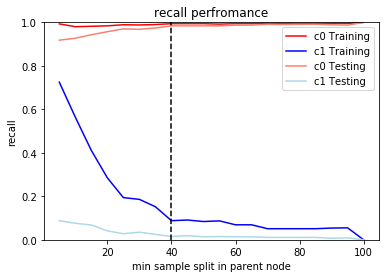

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training recall,class 0 Testing recall,class0 difference,class 1 Training recall,class 1 Testing recall,class1 difference,complexity
0,5,2,"(0.993,)","(0.918,)",[0.075],"(0.725,)","(0.088,)",[0.637],707
1,10,5,"(0.98,)","(0.927,)",[0.053],"(0.564,)","(0.076,)",[0.488],485
2,15,7,"(0.982,)","(0.943,)",[0.039],"(0.411,)","(0.068,)",[0.343],389
3,20,10,"(0.984,)","(0.957,)",[0.027],"(0.285,)","(0.041,)",[0.244],343
4,25,12,"(0.989,)","(0.97,)",[0.019],"(0.194,)","(0.028,)",[0.166],296
5,30,15,"(0.988,)","(0.968,)",[0.02],"(0.186,)","(0.035,)",[0.151],278
6,35,17,"(0.99,)","(0.974,)",[0.016],"(0.152,)","(0.025,)",[0.127],250
7,40,20,"(0.994,)","(0.984,)",[0.01],"(0.088,)","(0.015,)",[0.073],229
8,45,22,"(0.994,)","(0.984,)",[0.01],"(0.091,)","(0.019,)",[0.072],217
9,50,25,"(0.994,)","(0.984,)",[0.01],"(0.084,)","(0.014,)",[0.07],208


In [30]:
avoid_overfitting(100,train,test,train_class,test_class,line=40,score="recall")

C:\Anacon\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


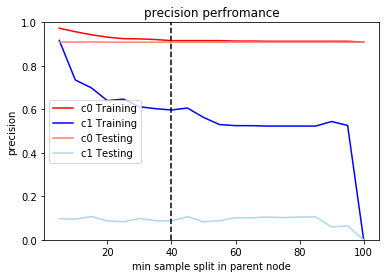

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training precision,class 0 Testing precision,class0 difference,class 1 Training precision,class 1 Testing precision,class1 difference,complexity
0,5,2,"(0.973,)","(0.91,)",[0.063],"(0.917,)","(0.097,)",[0.82],707
1,10,5,"(0.957,)","(0.909,)",[0.048],"(0.735,)","(0.095,)",[0.64],485
2,15,7,"(0.943,)","(0.91,)",[0.033],"(0.699,)","(0.107,)",[0.592],389
3,20,10,"(0.932,)","(0.909,)",[0.023],"(0.64,)","(0.087,)",[0.553],343
4,25,12,"(0.925,)","(0.909,)",[0.016],"(0.647,)","(0.083,)",[0.564],296
5,30,15,"(0.924,)","(0.909,)",[0.015],"(0.612,)","(0.098,)",[0.514],278
6,35,17,"(0.921,)","(0.909,)",[0.012],"(0.603,)","(0.088,)",[0.515],250
7,40,20,"(0.916,)","(0.909,)",[0.007],"(0.597,)","(0.087,)",[0.51],229
8,45,22,"(0.916,)","(0.909,)",[0.007],"(0.606,)","(0.106,)",[0.5],217
9,50,25,"(0.916,)","(0.909,)",[0.007],"(0.563,)","(0.083,)",[0.48],208


In [59]:
avoid_overfitting(100,train,test,train_class,test_class,line=40,score="precision")

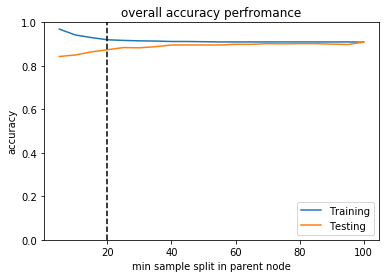

,Min # of case for parent nodes,Min # case in terminal nodes,Training set accuracy,Testing set accuracy,difference,complexity
0,5.0,2.0,0.969,0.843,0.126,707.0
1,10.0,5.0,0.942,0.850,0.092,485.0
2,15.0,7.0,0.930,0.864,0.066,389.0
3,20.0,10.0,0.920,0.874,0.046,343.0
4,25.0,12.0,0.917,0.884,0.033,296.0
5,30.0,15.0,0.915,0.883,0.032,278.0
6,35.0,17.0,0.914,0.888,0.026,250.0
7,40.0,20.0,0.912,0.896,0.016,229.0
8,45.0,22.0,0.912,0.896,0.016,217.0
9,50.0,25.0,0.911,0.896,0.015,208.0


In [60]:
avoid_overfitting(100,train,test,train_class,test_class,line=20,score="accuracy")

In [189]:
dt=DecisionTreeClassifier(max_depth=100,min_samples_split=20,min_samples_leaf=10)
dt.fit(train,train_class)
p_test=dt.predict(test)
p_train=dt.predict(train)

print("training set")
evaluation(train_class, p_train)

print("\ntesting set")
evaluation(test_class, p_test)

training set
[[8949  142]
 [ 656  253]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.96      9091
          1       0.64      0.28      0.39       909

avg / total       0.91      0.92      0.91     10000

accuracy: 0.9202

testing set
[[8710  381]
 [ 873   36]]
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      9091
          1       0.09      0.04      0.05       909

avg / total       0.83      0.87      0.85     10000

accuracy: 0.8746


#### Building decision tree on the balanced data

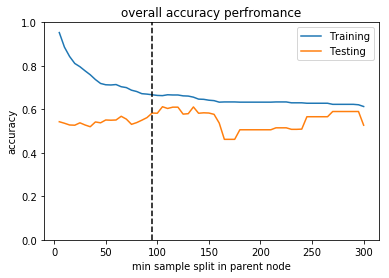

,Min # of case for parent nodes,Min # case in terminal nodes,Training set accuracy,Testing set accuracy,difference,complexity
0,5.0,2.0,0.953,0.543,0.410,260.0
1,10.0,5.0,0.886,0.536,0.350,190.0
2,15.0,7.0,0.843,0.528,0.315,157.0
3,20.0,10.0,0.811,0.527,0.284,121.0
4,25.0,12.0,0.796,0.538,0.258,108.0
5,30.0,15.0,0.777,0.528,0.249,92.0
6,35.0,17.0,0.759,0.520,0.239,78.0
7,40.0,20.0,0.737,0.542,0.195,68.0
8,45.0,22.0,0.719,0.538,0.181,62.0
9,50.0,25.0,0.713,0.551,0.162,54.0


In [73]:
avoid_overfitting(300,balanced_train_x,test,balanced_train_y,test_class,line=95,score="accuracy")

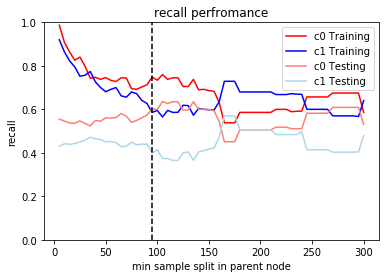

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training recall,class 0 Testing recall,class0 difference,class 1 Training recall,class 1 Testing recall,class1 difference,complexity
0,5,2,"(0.987,)","(0.555,)",[0.432],"(0.92,)","(0.43,)",[0.49],260
1,10,5,"(0.908,)","(0.546,)",[0.362],"(0.864,)","(0.442,)",[0.422],190
2,15,7,"(0.864,)","(0.537,)",[0.327],"(0.823,)","(0.439,)",[0.384],157
3,20,10,"(0.826,)","(0.536,)",[0.29],"(0.795,)","(0.443,)",[0.352],121
4,25,12,"(0.84,)","(0.547,)",[0.293],"(0.752,)","(0.45,)",[0.302],108
5,30,15,"(0.798,)","(0.535,)",[0.263],"(0.757,)","(0.458,)",[0.299],92
6,35,17,"(0.743,)","(0.524,)",[0.219],"(0.774,)","(0.472,)",[0.302],78
7,40,20,"(0.747,)","(0.549,)",[0.198],"(0.726,)","(0.465,)",[0.261],68
8,45,22,"(0.738,)","(0.545,)",[0.193],"(0.7,)","(0.461,)",[0.239],62
9,50,25,"(0.746,)","(0.561,)",[0.185],"(0.681,)","(0.45,)",[0.231],54


In [74]:
avoid_overfitting(300,balanced_train_x,test,balanced_train_y,test_class,line=95,score="recall")

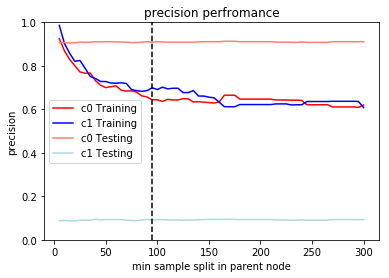

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training precision,class 0 Testing precision,class0 difference,class 1 Training precision,class 1 Testing precision,class1 difference,complexity
0,5,2,"(0.925,)","(0.907,)",[0.018],"(0.986,)","(0.088,)",[0.898],260
1,10,5,"(0.869,)","(0.907,)",[-0.038],"(0.903,)","(0.089,)",[0.814],190
2,15,7,"(0.83,)","(0.905,)",[-0.075],"(0.858,)","(0.087,)",[0.771],157
3,20,10,"(0.801,)","(0.906,)",[-0.105],"(0.821,)","(0.087,)",[0.734],121
4,25,12,"(0.772,)","(0.909,)",[-0.137],"(0.825,)","(0.09,)",[0.735],108
5,30,15,"(0.766,)","(0.908,)",[-0.142],"(0.789,)","(0.09,)",[0.699],92
6,35,17,"(0.767,)","(0.909,)",[-0.142],"(0.751,)","(0.09,)",[0.661],78
7,40,20,"(0.732,)","(0.911,)",[-0.179],"(0.742,)","(0.094,)",[0.648],68
8,45,22,"(0.711,)","(0.91,)",[-0.199],"(0.728,)","(0.092,)",[0.636],62
9,50,25,"(0.7,)","(0.911,)",[-0.211],"(0.728,)","(0.093,)",[0.635],54


In [75]:
avoid_overfitting(300,balanced_train_x,test,balanced_train_y,test_class,line=95,score="precision")

In [79]:
dt=DecisionTreeClassifier(max_depth=100,min_samples_split=95,min_samples_leaf=48)
dt.fit(balanced_train_x,balanced_train_y)
p_train=dt.predict(balanced_train_x)
p_test=dt.predict(test)

print("training set")
evaluation(balanced_train_y, p_train)
print("\ntesting set")
evaluation(test_class, p_test)

training set
[[680 229]
 [376 533]]
             precision    recall  f1-score   support

          0       0.64      0.75      0.69       909
          1       0.70      0.59      0.64       909

avg / total       0.67      0.67      0.67      1818

accuracy: 0.6672167216721672

testing set
[[5470 3621]
 [ 546  363]]
             precision    recall  f1-score   support

          0       0.91      0.60      0.72      9091
          1       0.09      0.40      0.15       909

avg / total       0.83      0.58      0.67     10000

accuracy: 0.5833


#### Building the decision tree on the normalize attributes with balanced data


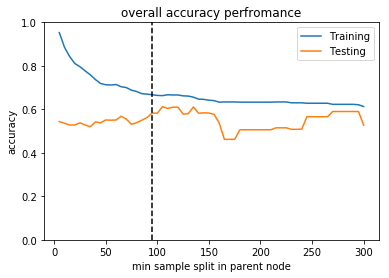

,Min # of case for parent nodes,Min # case in terminal nodes,Training set accuracy,Testing set accuracy,difference,complexity
0,5.0,2.0,0.953,0.544,0.409,260.0
1,10.0,5.0,0.886,0.536,0.350,190.0
2,15.0,7.0,0.843,0.528,0.315,157.0
3,20.0,10.0,0.811,0.528,0.283,121.0
4,25.0,12.0,0.796,0.538,0.258,108.0
5,30.0,15.0,0.777,0.528,0.249,92.0
6,35.0,17.0,0.759,0.520,0.239,78.0
7,40.0,20.0,0.737,0.542,0.195,68.0
8,45.0,22.0,0.719,0.538,0.181,62.0
9,50.0,25.0,0.713,0.551,0.162,54.0


In [94]:
avoid_overfitting(300,ntrain,ntest,balanced_train_y,test_class,line=95,score="accuracy")

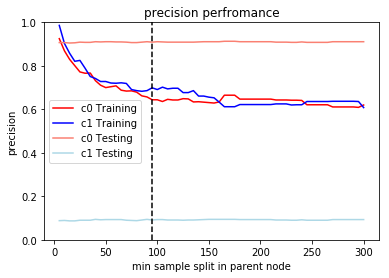

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training precision,class 0 Testing precision,class0 difference,class 1 Training precision,class 1 Testing precision,class1 difference,complexity
0,5,2,"(0.925,)","(0.907,)",[0.018],"(0.986,)","(0.088,)",[0.898],260
1,10,5,"(0.869,)","(0.907,)",[-0.038],"(0.903,)","(0.089,)",[0.814],190
2,15,7,"(0.83,)","(0.905,)",[-0.075],"(0.858,)","(0.087,)",[0.771],157
3,20,10,"(0.801,)","(0.906,)",[-0.105],"(0.821,)","(0.087,)",[0.734],121
4,25,12,"(0.772,)","(0.909,)",[-0.137],"(0.825,)","(0.09,)",[0.735],108
5,30,15,"(0.766,)","(0.908,)",[-0.142],"(0.789,)","(0.09,)",[0.699],92
6,35,17,"(0.767,)","(0.908,)",[-0.141],"(0.751,)","(0.09,)",[0.661],78
7,40,20,"(0.732,)","(0.911,)",[-0.179],"(0.742,)","(0.094,)",[0.648],68
8,45,22,"(0.711,)","(0.91,)",[-0.199],"(0.728,)","(0.092,)",[0.636],62
9,50,25,"(0.7,)","(0.911,)",[-0.211],"(0.728,)","(0.093,)",[0.635],54


In [95]:
avoid_overfitting(300,ntrain,ntest,balanced_train_y,test_class,line=95,score="precision")

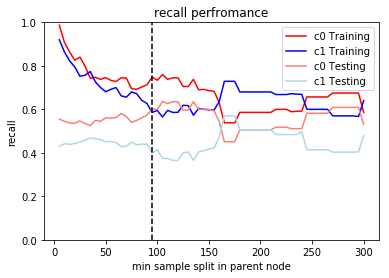

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training recall,class 0 Testing recall,class0 difference,class 1 Training recall,class 1 Testing recall,class1 difference,complexity
0,5,2,"(0.987,)","(0.555,)",[0.432],"(0.92,)","(0.43,)",[0.49],260
1,10,5,"(0.908,)","(0.545,)",[0.363],"(0.864,)","(0.442,)",[0.422],190
2,15,7,"(0.864,)","(0.537,)",[0.327],"(0.823,)","(0.439,)",[0.384],157
3,20,10,"(0.826,)","(0.536,)",[0.29],"(0.795,)","(0.443,)",[0.352],121
4,25,12,"(0.84,)","(0.547,)",[0.293],"(0.752,)","(0.45,)",[0.302],108
5,30,15,"(0.798,)","(0.535,)",[0.263],"(0.757,)","(0.458,)",[0.299],92
6,35,17,"(0.743,)","(0.525,)",[0.218],"(0.774,)","(0.469,)",[0.305],78
7,40,20,"(0.747,)","(0.549,)",[0.198],"(0.726,)","(0.465,)",[0.261],68
8,45,22,"(0.738,)","(0.545,)",[0.193],"(0.7,)","(0.461,)",[0.239],62
9,50,25,"(0.746,)","(0.561,)",[0.185],"(0.681,)","(0.45,)",[0.231],54


In [96]:
avoid_overfitting(300,ntrain,ntest,balanced_train_y,test_class,line=95,score="recall")

In [99]:
dt=DecisionTreeClassifier(max_depth=100,min_samples_split=95,min_samples_leaf=48)
dt.fit(ntrain,balanced_train_y)
p_train=dt.predict(ntrain)
p_test=dt.predict(ntest)

print("training set")
evaluation(balanced_train_y, p_train)
print("testing set")
evaluation(test_class, p_test)

training set
[[680 229]
 [376 533]]
             precision    recall  f1-score   support

          0       0.64      0.75      0.69       909
          1       0.70      0.59      0.64       909

avg / total       0.67      0.67      0.67      1818

accuracy: 0.6672167216721672
testing set
[[5470 3621]
 [ 546  363]]
             precision    recall  f1-score   support

          0       0.91      0.60      0.72      9091
          1       0.09      0.40      0.15       909

avg / total       0.83      0.58      0.67     10000

accuracy: 0.5833


#### Building decision tree on the feature selection balanced data

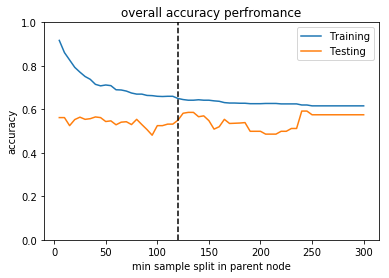

,Min # of case for parent nodes,Min # case in terminal nodes,Training set accuracy,Testing set accuracy,difference,complexity
0,5.0,2.0,0.917,0.562,0.355,317.0
1,10.0,5.0,0.861,0.562,0.299,219.0
2,15.0,7.0,0.827,0.525,0.302,170.0
3,20.0,10.0,0.793,0.553,0.240,135.0
4,25.0,12.0,0.771,0.564,0.207,108.0
5,30.0,15.0,0.751,0.554,0.197,93.0
6,35.0,17.0,0.738,0.557,0.181,76.0
7,40.0,20.0,0.715,0.565,0.150,64.0
8,45.0,22.0,0.708,0.562,0.146,58.0
9,50.0,25.0,0.712,0.544,0.168,55.0


In [85]:
avoid_overfitting(300,fs_xtrain,fs_xtest,balanced_train_y,test_class,line=120,score="accuracy")

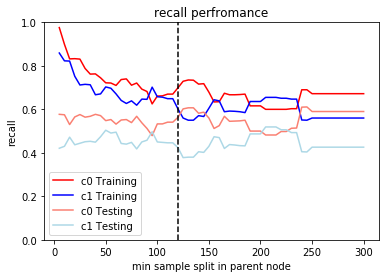

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training recall,class 0 Testing recall,class0 difference,class 1 Training recall,class 1 Testing recall,class1 difference,complexity
0,5,2,"(0.976,)","(0.577,)",[0.399],"(0.859,)","(0.421,)",[0.438],317
1,10,5,"(0.899,)","(0.575,)",[0.324],"(0.823,)","(0.43,)",[0.393],219
2,15,7,"(0.832,)","(0.53,)",[0.302],"(0.822,)","(0.472,)",[0.35],170
3,20,10,"(0.833,)","(0.565,)",[0.268],"(0.752,)","(0.437,)",[0.315],135
4,25,12,"(0.831,)","(0.576,)",[0.255],"(0.712,)","(0.444,)",[0.268],108
5,30,15,"(0.788,)","(0.564,)",[0.224],"(0.715,)","(0.451,)",[0.264],93
6,35,17,"(0.762,)","(0.568,)",[0.194],"(0.713,)","(0.453,)",[0.26],76
7,40,20,"(0.763,)","(0.577,)",[0.186],"(0.667,)","(0.449,)",[0.218],64
8,45,22,"(0.745,)","(0.571,)",[0.174],"(0.671,)","(0.474,)",[0.197],58
9,50,25,"(0.722,)","(0.548,)",[0.174],"(0.703,)","(0.504,)",[0.199],55


In [86]:
avoid_overfitting(300,fs_xtrain,fs_xtest,balanced_train_y,test_class,line=120,score="recall")

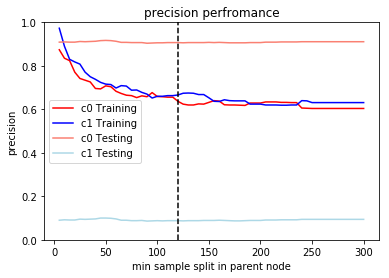

,Min # of case for parent nodes,Min # case in terminal nodes,class 0 Training precision,class 0 Testing precision,class0 difference,class 1 Training precision,class 1 Testing precision,class1 difference,complexity
0,5,2,"(0.874,)","(0.909,)",[-0.035],"(0.973,)","(0.09,)",[0.883],317
1,10,5,"(0.835,)","(0.91,)",[-0.075],"(0.89,)","(0.092,)",[0.798],219
2,15,7,"(0.824,)","(0.909,)",[-0.085],"(0.83,)","(0.091,)",[0.739],170
3,20,10,"(0.771,)","(0.909,)",[-0.138],"(0.818,)","(0.091,)",[0.727],135
4,25,12,"(0.742,)","(0.912,)",[-0.17],"(0.808,)","(0.095,)",[0.713],108
5,30,15,"(0.734,)","(0.911,)",[-0.177],"(0.771,)","(0.094,)",[0.677],93
6,35,17,"(0.726,)","(0.912,)",[-0.186],"(0.75,)","(0.095,)",[0.655],76
7,40,20,"(0.696,)","(0.913,)",[-0.217],"(0.738,)","(0.096,)",[0.642],64
8,45,22,"(0.694,)","(0.916,)",[-0.222],"(0.724,)","(0.1,)",[0.624],58
9,50,25,"(0.708,)","(0.917,)",[-0.209],"(0.716,)","(0.1,)",[0.616],55


In [87]:
avoid_overfitting(300,fs_xtrain,fs_xtest,balanced_train_y,test_class,line=120,score="precision")

In [90]:

dt=DecisionTreeClassifier(max_depth=100,min_samples_split=120,min_samples_leaf=60)
dt.fit(fs_xtrain,balanced_train_y)
p_train=dt.predict(fs_xtrain)
p_test=dt.predict(fs_xtest)

print("training set")
evaluation(balanced_train_y, p_train)
print("testing set")
evaluation(test_class, p_test)

training set
[[636 273]
 [361 548]]
             precision    recall  f1-score   support

          0       0.64      0.70      0.67       909
          1       0.67      0.60      0.63       909

avg / total       0.65      0.65      0.65      1818

accuracy: 0.6512651265126512
testing set
[[5169 3922]
 [ 528  381]]
             precision    recall  f1-score   support

          0       0.91      0.57      0.70      9091
          1       0.09      0.42      0.15       909

avg / total       0.83      0.56      0.65     10000

accuracy: 0.555


#### Randomforest 

#### Building the decision tree on the raw data

In [506]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

def sensitivity_c0(y_true,y_pred): return np.round(confusion_matrix(y_true,y_pred)[0,0]/9091,3)
def sensitivity_c1(y_true,y_pred): return np.round(confusion_matrix(y_true,y_pred)[1,1]/909,3)
                                         
scoring={'sensitivity_c0':make_scorer(sensitivity_c0),'sensitivity_c1':make_scorer(sensitivity_c1)}

train_performance_1=[]                                      
test_performance_1=[]                                      
for i in range(10,85,25):
    for s in range(2,22,2):
        clf=RandomForestClassifier(n_estimators=i,max_depth=1000,min_samples_split=s,min_samples_leaf=int(s/2))
        clf.fit(train,train_class)
        p_train=clf.predict(train)
        p_test=clf.predict(test)
        train_performance_1.append([np.round(accuracy_score(train_class,p_train),3),sensitivity_c0(train_class,p_train),sensitivity_c1(train_class,p_train)])
        test_performance_1.append([np.round(accuracy_score(test_class,p_test),3),sensitivity_c1(test_class,p_test),sensitivity_c1(test_class,p_test)])

C:\Anacon\lib\site-packages\ipykernel\__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

In [539]:
def parse(performance):
    a=[]
    r_c0=[]
    r_c1=[]
    for i in range(len(performance)):
        a.append(performance[i][0])
        r_c0.append(performance[i][1])
        r_c1.append(performance[i][2])
    return a,r_c0,r_c1

min_split=[s for s in range(2,22,2)]

In [534]:
a,b,c=parse(train_performance_1)
d,e,f=parse(test_performance_1)

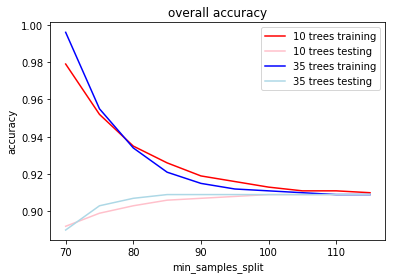

In [535]:
plt.plot(min_split,a[:10],color="red",label="10 trees training")
plt.plot(min_split,d[:10],color="pink",label="10 trees testing")
plt.plot(min_split,a[10:20],color="blue",label="35 trees training")
plt.plot(min_split,d[10:20],color="lightblue",label="35 trees testing")
#plt.plot(min_split,a[20:30],color="C3")
#plt.plot(min_split,a[20:30])
plt.title("overall accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.legend()
plt.show()

In [512]:
pd.concat([pd.concat([pd.DataFrame(parse(train_performance_1)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(train_performance_1)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(train_performance_1)[0][20:],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
2,0.979,0.996,0.998
4,0.952,0.955,0.953
6,0.935,0.934,0.932
8,0.926,0.921,0.921
10,0.919,0.915,0.914
12,0.916,0.912,0.911
14,0.913,0.911,0.910
16,0.911,0.910,0.910
18,0.911,0.909,0.909
20,0.910,0.909,0.909


In [513]:
pd.concat([pd.concat([pd.DataFrame(parse(test_performance_1)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(test_performance_1)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(test_performance_1)[0][20:],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
2,0.892,0.890,0.893
4,0.899,0.903,0.903
6,0.903,0.907,0.907
8,0.906,0.909,0.908
10,0.907,0.909,0.909
12,0.908,0.909,0.909
14,0.909,0.909,0.909
16,0.909,0.909,0.909
18,0.909,0.909,0.909
20,0.909,0.909,0.909


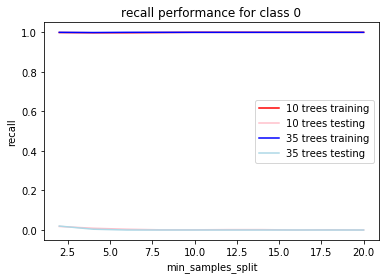

In [541]:
plt.plot(min_split,b[:10],color="red",label="10 trees training")
plt.plot(min_split,e[:10],color="pink",label="10 trees testing")
plt.plot(min_split,b[10:20],color="blue",label="35 trees training")
plt.plot(min_split,e[10:20],color="lightblue",label="35 trees testing")
plt.title("recall performance for class 0")
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.legend()
plt.show()

In [515]:
pd.concat([pd.concat([pd.DataFrame(parse(train_performance_1)[1][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(train_performance_1)[1][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(train_performance_1)[1][20:],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
2,0.999,1.000,1.000
4,0.998,0.999,0.999
6,0.998,1.000,1.000
8,0.999,1.000,1.000
10,1.000,1.000,1.000
12,1.000,1.000,1.000
14,1.000,1.000,1.000
16,1.000,1.000,1.000
18,1.000,1.000,1.000
20,1.000,1.000,1.000


In [516]:
pd.concat([pd.concat([pd.DataFrame(parse(test_performance_1)[1][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(test_performance_1)[1][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(test_performance_1)[1][20:],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
2,0.018,0.020,0.017
4,0.009,0.004,0.006
6,0.004,0.000,0.002
8,0.001,0.000,0.000
10,0.001,0.000,0.000
12,0.002,0.000,0.000
14,0.002,0.000,0.000
16,0.000,0.000,0.000
18,0.001,0.000,0.000
20,0.000,0.000,0.000


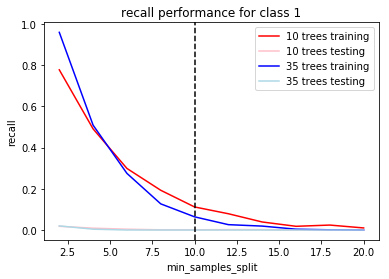

In [540]:
plt.plot(min_split,c[:10],color="red",label="10 trees training")
plt.plot(min_split,f[:10],color="pink",label="10 trees testing")
plt.plot(min_split,c[10:20],color="blue",label="35 trees training")
plt.plot(min_split,f[10:20],color="lightblue",label="35 trees testing")
#plt.plot(min_split,c[20:30],color="C3")
#plt.plot(min_split,a[20:30])
plt.title("recall performance for class 1")
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.axvline(x=10, color='k', linestyle='--') 
plt.legend()
plt.show()

In [518]:
pd.concat([pd.concat([pd.DataFrame(parse(train_performance_1)[2][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(train_performance_1)[2][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(train_performance_1)[2][20:],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
2,0.778,0.960,0.977
4,0.491,0.509,0.495
6,0.299,0.275,0.260
8,0.193,0.127,0.131
10,0.112,0.064,0.055
12,0.079,0.026,0.025
14,0.039,0.019,0.013
16,0.018,0.004,0.008
18,0.024,0.001,0.002
20,0.010,0.000,0.001


In [519]:
pd.concat([pd.concat([pd.DataFrame(parse(test_performance_1)[2][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(test_performance_1)[2][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(test_performance_1)[2][20:],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
2,0.018,0.020,0.017
4,0.009,0.004,0.006
6,0.004,0.000,0.002
8,0.001,0.000,0.000
10,0.001,0.000,0.000
12,0.002,0.000,0.000
14,0.002,0.000,0.000
16,0.000,0.000,0.000
18,0.001,0.000,0.000
20,0.000,0.000,0.000


In [674]:
clf=RandomForestClassifier(n_estimators=35,max_depth=1000,min_samples_split=10,min_samples_leaf=int(10/2))
clf.fit(train,train_class)
p_train=clf.predict(train)
p_test=clf.predict(test)

print("training set")
evaluation(train_class, p_train)
print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training set
[[9091    0]
 [ 850   59]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.96      9091
          1       1.00      0.06      0.12       909

avg / total       0.92      0.92      0.88     10000

accuracy: 0.915

testing set
[[9089    2]
 [ 909    0]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      9091
          1       0.00      0.00      0.00       909

avg / total       0.83      0.91      0.87     10000

accuracy: 0.9089


#### Building decision tree on the balanced data

In [585]:
def sensitivity_c0(y_true,y_pred): return np.round(confusion_matrix(y_true,y_pred)[0,0]/909,3)
def sensitivity_c1(y_true,y_pred): return np.round(confusion_matrix(y_true,y_pred)[1,1]/909,3)
                                         
scoring={'sensitivity_c0':make_scorer(sensitivity_c0),'sensitivity_c1':make_scorer(sensitivity_c1)}

train_performance_2=[]                                      
test_performance_2=[]                                      
for i in range(10,105,25):
    for s in range(70,120,5):
        clf=RandomForestClassifier(n_estimators=i,max_depth=1000,min_samples_split=s,min_samples_leaf=int(s/2))
        clf.fit(balanced_train_x,balanced_train_y)
        p_train=clf.predict(balanced_train_x)
        p_test=clf.predict(test)
        train_performance_2.append([np.round(accuracy_score(balanced_train_y,p_train),3),sensitivity_c0(balanced_train_y,p_train),sensitivity_c1(balanced_train_y,p_train)])
        test_performance_2.append([np.round(accuracy_score(test_class,p_test),3),sensitivity_c0(test_class,p_test),sensitivity_c1(test_class,p_test)])

C:\Anacon\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

In [613]:
a,b,c=parse(train_performance_2)
d,e,f=parse(test_performance_2)
min_split=[s for s in range(70,120,5)]

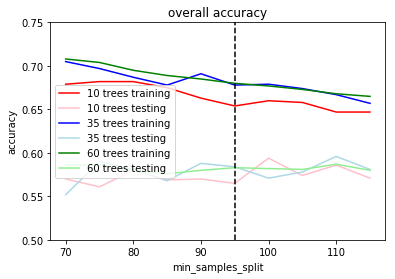

In [614]:
plt.plot(min_split,a[:10],color="red",label="10 trees training")
plt.plot(min_split,d[:10],color="pink",label="10 trees testing")
plt.plot(min_split,a[10:20],color="blue",label="35 trees training")
plt.plot(min_split,d[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,a[20:30],color="green",label="60 trees training")
plt.plot(min_split,d[20:30],color="lightgreen",label="60 trees testing")
plt.title("overall accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.ylim(0.5,0.75)
plt.axvline(x=95, color='k', linestyle='--') 
plt.legend()
plt.show()

In [480]:
pd.concat([pd.concat([pd.DataFrame(parse(train_performance_2)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(train_performance_2)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(train_performance_2)[0][20:30],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
70,0.691,0.695,0.705
75,0.693,0.696,0.710
80,0.679,0.694,0.687
85,0.679,0.681,0.685
90,0.674,0.679,0.685
95,0.656,0.669,0.678
100,0.684,0.670,0.682
105,0.663,0.669,0.667
110,0.653,0.682,0.667
115,0.657,0.664,0.668


In [500]:
pd.concat([pd.concat([pd.DataFrame(parse(test_performance_2)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(test_performance_2)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(test_performance_2)[0][20:30],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
70,0.582,0.578,0.587
75,0.554,0.590,0.588
80,0.566,0.593,0.578
85,0.556,0.580,0.592
90,0.561,0.587,0.578
95,0.547,0.577,0.577
100,0.573,0.591,0.586
105,0.556,0.598,0.598
110,0.592,0.560,0.582
115,0.564,0.589,0.582


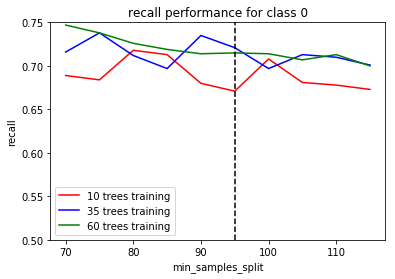

In [616]:
plt.plot(min_split,b[:10],color="red",label="10 trees training")
#plt.plot(min_split,e[:10],color="pink",label="10 trees testing")
plt.plot(min_split,b[10:20],color="blue",label="35 trees training")
#plt.plot(min_split,e[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,b[20:30],color="green",label="60 trees training")
#plt.plot(min_split,e[20:30],color="lightgreen",label="60 trees testing")
plt.title("recall performance for class 0")
plt.axvline(x=95, color='k', linestyle='--') 
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.ylim(0.5,0.75)
plt.legend()
plt.show()

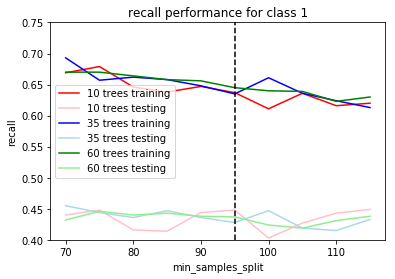

In [619]:
plt.plot(min_split,c[:10],color="red",label="10 trees training")
plt.plot(min_split,f[:10],color="pink",label="10 trees testing")
plt.plot(min_split,c[10:20],color="blue",label="35 trees training")
plt.plot(min_split,f[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,c[20:30],color="green",label="60 trees training")
plt.plot(min_split,f[20:30],color="lightgreen",label="60 trees testing")
plt.title("recall performance for class 1")
plt.axvline(x=95, color='k', linestyle='--')
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.ylim(0.4,0.75)
plt.legend()
plt.show()

In [673]:
clf=RandomForestClassifier(n_estimators=60,max_depth=1000,min_samples_split=95,min_samples_leaf=int(95/2))
clf.fit(balanced_train_x,balanced_train_y)
p_train=clf.predict(balanced_train_x)
p_test=clf.predict(test)

print("training set")
evaluation(balanced_train_y, p_train)
print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training set
[[660 249]
 [332 577]]
             precision    recall  f1-score   support

          0       0.67      0.73      0.69       909
          1       0.70      0.63      0.67       909

avg / total       0.68      0.68      0.68      1818

accuracy: 0.6804180418041804

testing set
[[5457 3634]
 [ 524  385]]
             precision    recall  f1-score   support

          0       0.91      0.60      0.72      9091
          1       0.10      0.42      0.16       909

avg / total       0.84      0.58      0.67     10000

accuracy: 0.5842


#### Building the decision tree on the normalize attributes with balanced data

In [625]:
def sensitivity_c0(y_true,y_pred): return np.round(confusion_matrix(y_true,y_pred)[0,0]/909,3)
def sensitivity_c1(y_true,y_pred): return np.round(confusion_matrix(y_true,y_pred)[1,1]/909,3)
train_performance_3=[]                                      
test_performance_3=[]                                      
for i in range(10,105,25):
    for s in range(70,120,5):
        clf=RandomForestClassifier(n_estimators=i,max_depth=1000,min_samples_split=s,min_samples_leaf=int(s/2))
        clf.fit(ntrain,balanced_train_y)
        p_train=clf.predict(ntrain)
        p_test=clf.predict(ntest)
        train_performance_3.append([np.round(accuracy_score(balanced_train_y,p_train),3),sensitivity_c0(balanced_train_y,p_train),sensitivity_c1(balanced_train_y,p_train)])
        test_performance_3.append([np.round(accuracy_score(test_class,p_test),3),sensitivity_c0(test_class,p_test),sensitivity_c1(test_class,p_test)])

C:\Anacon\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

In [655]:
a,b,c=parse(train_performance_3)
d,e,f=parse(test_performance_3)
min_split=[s for s in range(70,120,5)]

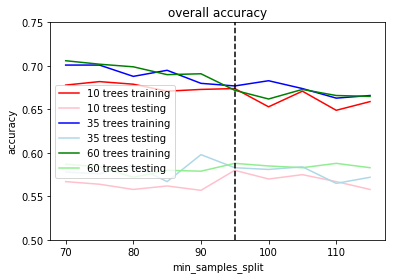

In [627]:


plt.plot(min_split,a[:10],color="red",label="10 trees training")
plt.plot(min_split,d[:10],color="pink",label="10 trees testing")
plt.plot(min_split,a[10:20],color="blue",label="35 trees training")
plt.plot(min_split,d[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,a[20:30],color="green",label="60 trees training")
plt.plot(min_split,d[20:30],color="lightgreen",label="60 trees testing")
plt.title("overall accuracy")
plt.ylabel("accuracy")
plt.ylim(0.5,0.75)
plt.xlabel("min_samples_split")
plt.axvline(x=95, color='k', linestyle='--') 
plt.legend()
plt.show()

In [607]:
pd.concat([pd.concat([pd.DataFrame(parse(train_performance_3)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(train_performance_3)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(train_performance_3)[0][20:30],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
70,0.690,0.709,0.718
75,0.678,0.697,0.708
80,0.673,0.697,0.701
85,0.662,0.684,0.690
90,0.661,0.674,0.685
95,0.658,0.665,0.678
100,0.655,0.673,0.678
105,0.658,0.664,0.670
110,0.663,0.662,0.668
115,0.651,0.667,0.674


In [608]:
pd.concat([pd.concat([pd.DataFrame(parse(test_performance_3)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(test_performance_3)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(test_performance_3)[0][20:30],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
70,0.568,0.574,0.580
75,0.571,0.565,0.582
80,0.587,0.598,0.588
85,0.577,0.589,0.582
90,0.570,0.586,0.585
95,0.582,0.600,0.587
100,0.573,0.582,0.590
105,0.558,0.586,0.583
110,0.588,0.587,0.589
115,0.552,0.576,0.586


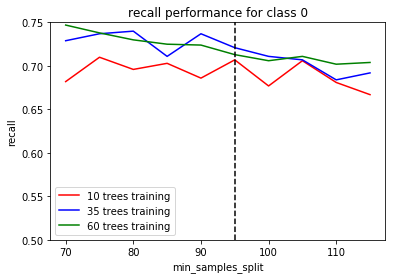

In [629]:
plt.plot(min_split,b[:10],color="red",label="10 trees training")
#plt.plot(min_split,e[:10],color="pink",label="10 trees testing")
plt.plot(min_split,b[10:20],color="blue",label="35 trees training")
#plt.plot(min_split,e[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,b[20:30],color="green",label="60 trees training")
#plt.plot(min_split,e[20:30],color="lightgreen",label="60 trees testing")
plt.title("recall performance for class 0")
plt.axvline(x=95, color='k', linestyle='--') 
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.ylim(0.5,0.75)
plt.legend()
plt.show()

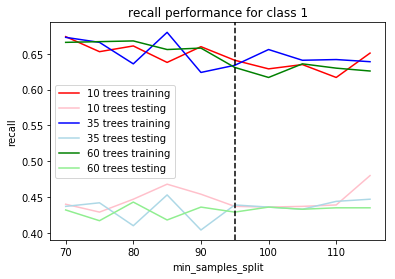

In [630]:
plt.plot(min_split,c[:10],color="red",label="10 trees training")
plt.plot(min_split,f[:10],color="pink",label="10 trees testing")
plt.plot(min_split,c[10:20],color="blue",label="35 trees training")
plt.plot(min_split,f[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,c[20:30],color="green",label="60 trees training")
plt.plot(min_split,f[20:30],color="lightgreen",label="60 trees testing")
plt.title("recall performance for class 1")
plt.axvline(x=95, color='k', linestyle='--')
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.legend()
plt.show()

In [662]:
clf=RandomForestClassifier(n_estimators=60,max_depth=1000,min_samples_split=95,min_samples_leaf=int(95/2))
clf.fit(ntrain,balanced_train_y)
p_train=clf.predict(ntrain)
p_test=clf.predict(ntest)

print("training set")
evaluation(balanced_train_y, p_train)
print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training set
[[656 253]
 [325 584]]
             precision    recall  f1-score   support

          0       0.67      0.72      0.69       909
          1       0.70      0.64      0.67       909

avg / total       0.68      0.68      0.68      1818

accuracy: 0.682068206820682

testing set
[[5375 3716]
 [ 511  398]]
             precision    recall  f1-score   support

          0       0.91      0.59      0.72      9091
          1       0.10      0.44      0.16       909

avg / total       0.84      0.58      0.67     10000

accuracy: 0.5773


#### Building decision tree on the feature selection balanced data

In [637]:
train_performance_4=[]                                      
test_performance_4=[]                                      
for i in range(10,105,25):
    for s in range(70,120,5):
        clf=RandomForestClassifier(n_estimators=i,max_depth=1000,min_samples_split=s,min_samples_leaf=int(s/2))
        clf.fit(fs_xtrain,balanced_train_y)
        p_train=clf.predict(fs_xtrain)
        p_test=clf.predict(fs_xtest)
        train_performance_4.append([np.round(accuracy_score(balanced_train_y,p_train),3),sensitivity_c0(balanced_train_y,p_train),sensitivity_c1(balanced_train_y,p_train)])
        test_performance_4.append([np.round(accuracy_score(test_class,p_test),3),sensitivity_c0(test_class,p_test),sensitivity_c1(test_class,p_test)])

C:\Anacon\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anacon\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

In [638]:
a,b,c=parse(train_performance_4)
d,e,f=parse(test_performance_4)
min_split=[s for s in range(70,120,5)]

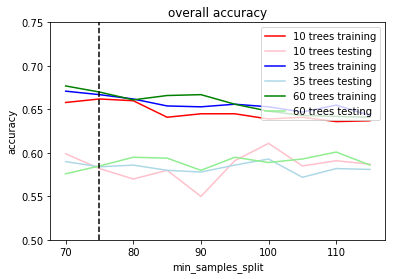

In [649]:
plt.plot(min_split,a[:10],color="red",label="10 trees training")
plt.plot(min_split,d[:10],color="pink",label="10 trees testing")
plt.plot(min_split,a[10:20],color="blue",label="35 trees training")
plt.plot(min_split,d[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,a[20:30],color="green",label="60 trees training")
plt.plot(min_split,d[20:30],color="lightgreen",label="60 trees testing")

plt.title("overall accuracy")
plt.ylabel("accuracy")
plt.ylim(0.5,0.75)
plt.xlabel("min_samples_split")
plt.axvline(x=75, color='k', linestyle='--') 
plt.legend()
plt.show()

In [642]:
pd.concat([pd.concat([pd.DataFrame(parse(train_performance_4)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(train_performance_4)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(train_performance_4)[0][20:30],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
70,0.658,0.671,0.677
75,0.662,0.667,0.670
80,0.660,0.662,0.661
85,0.641,0.654,0.666
90,0.645,0.653,0.667
95,0.645,0.656,0.656
100,0.639,0.653,0.648
105,0.641,0.647,0.643
110,0.636,0.655,0.642
115,0.637,0.643,0.641


In [643]:
pd.concat([pd.concat([pd.DataFrame(parse(test_performance_4)[0][:10],min_split,columns=["10 trees"]),
pd.DataFrame(parse(test_performance_4)[0][10:20],min_split,columns=["35 trees"])],axis=1),
pd.DataFrame(parse(test_performance_4)[0][20:30],min_split,columns=["60 trees"])],axis=1)

,10 trees,35 trees,60 trees
70,0.599,0.590,0.576
75,0.582,0.584,0.585
80,0.570,0.586,0.595
85,0.580,0.580,0.594
90,0.550,0.578,0.580
95,0.591,0.586,0.595
100,0.611,0.593,0.589
105,0.585,0.572,0.593
110,0.591,0.582,0.601
115,0.587,0.581,0.586


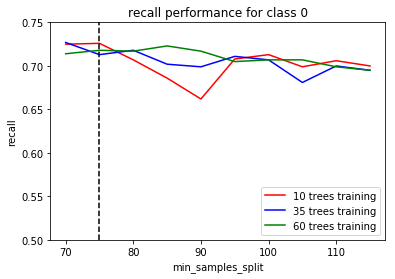

In [645]:
plt.plot(min_split,b[:10],color="red",label="10 trees training")
#plt.plot(min_split,e[:10],color="pink",label="10 trees testing")
plt.plot(min_split,b[10:20],color="blue",label="35 trees training")
#plt.plot(min_split,e[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,b[20:30],color="green",label="60 trees training")
#plt.plot(min_split,e[20:30],color="lightgreen",label="60 trees testing")
plt.title("recall performance for class 0")
plt.axvline(x=75, color='k', linestyle='--') 
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.ylim(0.5,0.75)
plt.legend()
plt.show()

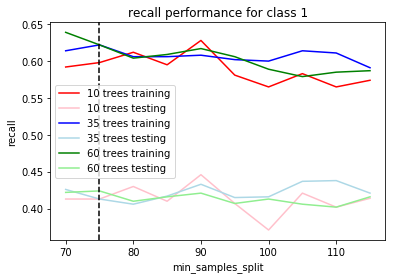

In [646]:
plt.plot(min_split,c[:10],color="red",label="10 trees training")
plt.plot(min_split,f[:10],color="pink",label="10 trees testing")
plt.plot(min_split,c[10:20],color="blue",label="35 trees training")
plt.plot(min_split,f[10:20],color="lightblue",label="35 trees testing")
plt.plot(min_split,c[20:30],color="green",label="60 trees training")
plt.plot(min_split,f[20:30],color="lightgreen",label="60 trees testing")
plt.title("recall performance for class 1")
plt.axvline(x=75, color='k', linestyle='--')
plt.ylabel("recall")
plt.xlabel("min_samples_split")
plt.legend()
plt.show()

In [654]:
clf=RandomForestClassifier(n_estimators=60,max_depth=1000,min_samples_split=75,min_samples_leaf=int(75/2))
clf.fit(fs_xtrain,balanced_train_y)
p_train=clf.predict(fs_xtrain)
p_test=clf.predict(fs_xtest)

print("training set")
evaluation(balanced_train_y, p_train)
print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training set
[[650 259]
 [343 566]]
             precision    recall  f1-score   support

          0       0.65      0.72      0.68       909
          1       0.69      0.62      0.65       909

avg / total       0.67      0.67      0.67      1818

accuracy: 0.6688668866886689

testing set
[[5402 3689]
 [ 523  386]]
             precision    recall  f1-score   support

          0       0.91      0.59      0.72      9091
          1       0.09      0.42      0.15       909

avg / total       0.84      0.58      0.67     10000

accuracy: 0.5788


#### Testing set performance

In [675]:
clf=RandomForestClassifier(n_estimators=60,max_depth=1000,min_samples_split=95,min_samples_leaf=int(95/2))
clf.fit(train,train_class)
p_train=clf.predict(train)
p_test=clf.predict(test)

print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app



testing set
[[9091    0]
 [ 909    0]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      9091
          1       0.00      0.00      0.00       909

avg / total       0.83      0.91      0.87     10000

accuracy: 0.9091


C:\Anacon\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [676]:
clf=RandomForestClassifier(n_estimators=60,max_depth=1000,min_samples_split=95,min_samples_leaf=int(95/2))
clf.fit(balanced_train_x,balanced_train_y)
p_train=clf.predict(balanced_train_x)
p_test=clf.predict(test)

print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app



testing set
[[5516 3575]
 [ 530  379]]
             precision    recall  f1-score   support

          0       0.91      0.61      0.73      9091
          1       0.10      0.42      0.16       909

avg / total       0.84      0.59      0.68     10000

accuracy: 0.5895


In [677]:
clf=RandomForestClassifier(n_estimators=60,max_depth=1000,min_samples_split=95,min_samples_leaf=int(95/2))
clf.fit(ntrain,balanced_train_y)
p_train=clf.predict(ntrain)
p_test=clf.predict(ntest)

print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app



testing set
[[5391 3700]
 [ 520  389]]
             precision    recall  f1-score   support

          0       0.91      0.59      0.72      9091
          1       0.10      0.43      0.16       909

avg / total       0.84      0.58      0.67     10000

accuracy: 0.578


In [678]:
clf=RandomForestClassifier(n_estimators=60,max_depth=1000,min_samples_split=95,min_samples_leaf=int(95/2))
clf.fit(fs_xtrain,balanced_train_y)
p_train=clf.predict(fs_xtrain)
p_test=clf.predict(fs_xtest)

print("\ntesting set")
evaluation(test_class, p_test)

C:\Anacon\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app



testing set
[[5500 3591]
 [ 537  372]]
             precision    recall  f1-score   support

          0       0.91      0.60      0.73      9091
          1       0.09      0.41      0.15       909

avg / total       0.84      0.59      0.67     10000

accuracy: 0.5872
